## Value at Risk (VaR) calculation of a stock portfolio (parametric method)

Value at risk (VaR) is a statistic used to try and quantify the level of financial risk within a firm or portfolio over a specified time frame. VaR provides an estimate of the maximum loss from a given position or portfolio over a period of time and for a given confidence level.

Based on the following article: https://www.interviewqs.com/blog/value-at-risk

### VaR for 1-day period

In [1]:
# Packages Import
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# We set the data of our portfolio of equities
tickers = ['AAPL','FB', 'C', 'DIS']
weights = np.array([.25, .3, .15, .3])
initial_inv = 10000

In [3]:
# We download price data (closing) for 1 years
data = yf.download(tickers, period='5y', interval='1d')['Close']
data.tail()

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- FB: No data found, symbol may be delisted


,AAPL,C,DIS,FB
Date,,,,
2024-06-10 00:00:00,193.119995,61.430000,102.739998,NaN
2024-06-11 00:00:00,207.149994,59.139999,100.870003,NaN
2024-06-12 00:00:00,213.070007,60.009998,100.800003,NaN
2024-06-13 00:00:00,214.240005,60.230000,100.089996,NaN
2024-06-14 00:00:00,212.490005,59.330002,99.970001,NaN


In [4]:
# We calculate the periodic returns from closing prices
returns = data.pct_change()
returns.describe()

,AAPL,C,DIS,FB
count,1258.000000,1258.000000,1258.000000,0.0
mean,0.001376,0.000208,-0.000046,NaN
std,0.020046,0.024423,0.021362,NaN
min,-0.128647,-0.192986,-0.131632,NaN
25%,-0.008212,-0.011214,-0.010024,NaN
50%,0.001096,0.000000,-0.000186,NaN
75%,0.012257,0.011082,0.009626,NaN
max,0.119808,0.179843,0.144123,NaN


In [5]:
# We create the variance-covariance matrix
cov_matrix = returns.cov()
cov_matrix

,AAPL,C,DIS,FB
AAPL,0.000402,0.000213,0.000193,NaN
C,0.000213,0.000596,0.000309,NaN
DIS,0.000193,0.000309,0.000456,NaN
FB,NaN,NaN,NaN,NaN


In [6]:
# We calculate portfolio returns and volatility
mean_returns = returns.mean() # mean return for each asset
pf_mean = mean_returns.dot(weights)
pf_std = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

In [7]:
# We set our confidence level to 95%
conf_level = 0.95

# We calcutate the return associated to the confidence level
# The .ppf() function will calculate the normal distribution value for a given probability
cdf_return = norm.ppf((1-conf_level), pf_mean, pf_std)

In [8]:
# We calculate the VaR for our 1K$ investment.
var = initial_inv - (initial_inv * (1 + cdf_return))
var

nan

### VaR over n-day time period

In [9]:
# We calculate the VaR for different time period.
# We multiply the one-day VaR by the square root of the time period
vars = []
num_days = 15
for i in range(1, num_days + 1):
    vars.append(np.round(var * np.sqrt(i), 2))

Text(0.5, 1.0, 'Max portfolio loss (VaR) over 15-day period')

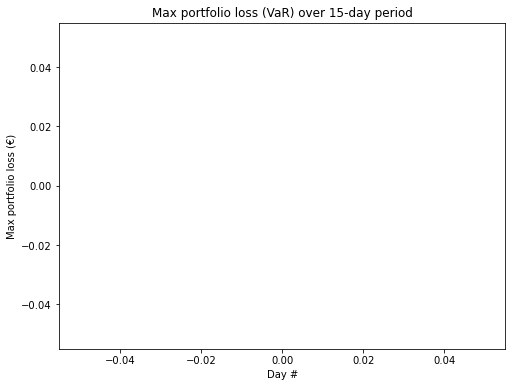

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
time_periods = np.linspace(1, num_days, num_days)
ax.plot(time_periods, vars, color='r')
ax.set_xlabel("Day #")
ax.set_ylabel("Max portfolio loss (€)")
ax.set_title("Max portfolio loss (VaR) over 15-day period")

<IPython.core.display.Javascript object>


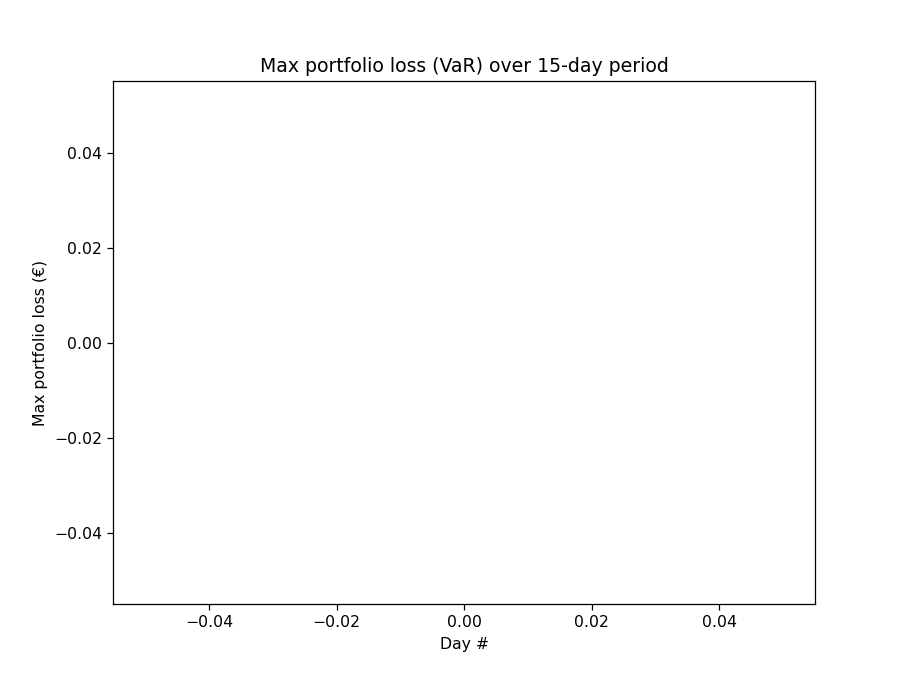

In [11]:
%matplotlib notebook

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
time_periods = np.linspace(1, num_days, num_days)
ax.set_xlabel("Day #")
ax.set_ylabel("Max portfolio loss (€)")
ax.set_title("Max portfolio loss (VaR) over 15-day period")
def animate(frame):
    ax.plot(time_periods[frame], vars[frame], color='r')

ani = FuncAnimation(fig=fig, func=animate, frames=num_days, interval=500, repeat=True)
HTML(ani.to_html5_video())